# Forecast for Copper Price

### Step 01: Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Step 02: Find the tables on website "Westmetall"

In [301]:
data = pd.read_html("https://www.westmetall.com/en/markdaten.php?action=table&field=LME_Cu_cash")
table = pd.concat(data, ignore_index=True)
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        4544 non-null   object
 1   LME Copper Cash-Settlement  4544 non-null   object
 2   LME Copper 3-month          4544 non-null   object
 3   LME Copper stock            4544 non-null   object
dtypes: object(4)
memory usage: 142.1+ KB


### Step 03: Formatting the table for processing

1. Format the "date" column.
2. Separate days, months and years into differents columns.
3. Convert the values of the columns "LME Copper Cash-Settlement", "LME Copper 3-month", and "LME Copper stock" to float.

In [302]:
table = table[table["date"]!= "date"]
table["date"] = pd.to_datetime(table["date"], format="%d. %B %Y")  
table["year"] = table["date"].dt.year
table["month"] = table["date"].dt.month
table["day"] = table["date"].dt.day
table[["LME Copper Cash-Settlement", "LME Copper 3-month", "LME Copper stock"]] = table[[
    "LME Copper Cash-Settlement", "LME Copper 3-month", "LME Copper stock"
]].apply(pd.to_numeric, errors="coerce")

table.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4355 entries, 0 to 4543
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        4355 non-null   datetime64[ns]
 1   LME Copper Cash-Settlement  4352 non-null   float64       
 2   LME Copper 3-month          4352 non-null   float64       
 3   LME Copper stock            4354 non-null   float64       
 4   year                        4355 non-null   int32         
 5   month                       4355 non-null   int32         
 6   day                         4355 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 221.2 KB


Visualize data

In [303]:
table.head()

,date,LME Copper Cash-Settlement,LME Copper 3-month,LME Copper stock,year,month,day
0,2025-03-20,9911.5,9951.0,223275.0,2025,3,20
1,2025-03-19,9914.0,9955.0,225175.0,2025,3,19
2,2025-03-18,9834.0,9888.0,227700.0,2025,3,18
3,2025-03-17,9748.0,9820.0,230975.0,2025,3,17
4,2025-03-14,9759.0,9810.0,233750.0,2025,3,14


Null Values

In [304]:
table.isna().sum()

date                          0
LME Copper Cash-Settlement    3
LME Copper 3-month            3
LME Copper stock              1
year                          0
month                         0
day                           0
dtype: int64

In [305]:
table = table.dropna()

Verify

In [306]:
table.isna().sum()

date                          0
LME Copper Cash-Settlement    0
LME Copper 3-month            0
LME Copper stock              0
year                          0
month                         0
day                           0
dtype: int64

### Step 04: Model Training

Variables assigment

In [307]:
X = table[["LME Copper stock", "year", "month", "day"]]
y = table["LME Copper Cash-Settlement"]

Parameters

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

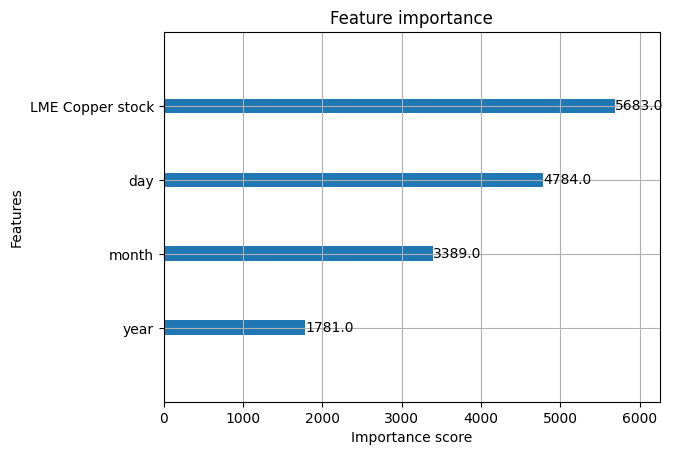

In [309]:
model = xgb.XGBRegressor(objective="reg:squarederror",
                         n_estimators=100,
                         learning_rate=0.1,
                         max_depth = 8,
                         subsample = 0.9,
                         colsample_bytree = 0.9)
model.fit(X_train, y_train)

xgb.plot_importance(model, ax =plt.gca())

In [310]:
y_pred = model.predict(X_test)
mse = r2_score(y_test, y_pred) 
rmse = mse ** 0.5 

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 0.9863428874783594
RMSE: 0.9931479685718334
